In [1]:
# Usada para navegar pelos diretórios do sistema operacioal
from sklearn.linear_model import LinearRegression
import os

# Biblioteca para trabalhar com vetores e matrizes
import numpy as np

# Usada para criar os gráficos
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # necessária para figuras 3D

# Cria as figuras dentro do jupyter
%matplotlib inline

# Bilbioteca para implementação do Scikit-learn para a regressão linear


## Primeiros passos 

É necessário abrir e visualizar os dados.

Os dados se referem a uma rede de food trucks espalhada por várias cidades. A primeira coluna representa a população de uma cidade, em múltiplos de 10.000 habitantes, e a segunda coluna representa o lucro de um food truck nessa cidade, em milhares de reais (R$10.000). Valores negativos na segunda coluna indicam prejuízo.

In [2]:
data = np.loadtxt(os.path.join('Dados', 'data1.txt'), delimiter=',')
m = np.shape(data)[0]
print('Os cinco primeiros dados: ')
print(data[:5])
print('Tamanho da matriz: ', np.shape(data))

# Podemos observar que a variavel 'data' contem 2 colunas e 97 linhas.


Os cinco primeiros dados: 
[[ 6.1101 17.592 ]
 [ 5.5277  9.1302]
 [ 8.5186 13.662 ]
 [ 7.0032 11.854 ]
 [ 5.8598  6.8233]]
Tamanho da matriz:  (97, 2)


Text(0.5, 0, 'População')

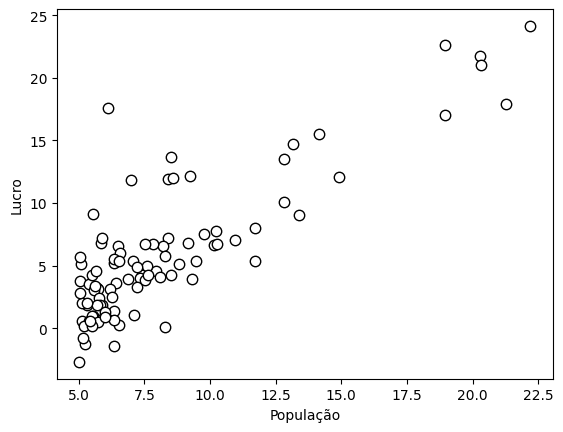

In [3]:
# Podemos entao separar o 'data' em duas variáveis distintas
X, y = data[:, 0], data[:, 1]
# Para vizualisar os dados podemos entao utilizar a biblioteca matplotlib


plt.plot(X, y, 'wo', ms=7.5, mec='k')
plt.ylabel('Lucro')
plt.xlabel('População')


## Segundo passo

Analisando visualmente os dados, é possível notar que eles seguem uma tendência linear. Podemos, então, realizar uma regressão linear para prever lucros futuros a partir da população.


#### Função Custo

A ideia consiste em criar uma reta que melhor descreva os dados do nosso problema. A partir de um chute inicial, é possível construir uma reta sobre os pontos e calcular sua "qualidade".

Sabendo o quão próximos estamos de ajustar nossa reta, podemos, então, atualizar seus valores para nos aproximarmos cada vez mais de uma reta "ideal". Em outras palavras, o objetivo da regressão linear é minimizar a função custo, que é responsável por determinar o quão longe estamos do valor ideal. A função custo, também conhecida como Método dos Mínimos Quadrados, é matematicamente determinada por:

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2,$$ 



onde, m é o tamanho do conjunto de dados, y o valor real do 'lucro' e  $h_\theta(x)$ descreve matemaricamente um reta 

$$ h_\theta(x) = \theta_0 + \theta_1 x_1. = \theta^Tx . $$


Os valores atualizados são $\theta_0$ e $\theta_1$, também conhecidos como coeficientes linear e angular, respectivamente. Com esses dois valores, podemos descrever qualquer reta em um plano cartesiano.

Para otimizar nossa implementação, vetorizamos o código para trabalharmos com matrizes no lugar de loops. Adicionamos uma coluna de 1's ao array X; assim, temos o primeiro eixo representando as amostras de treino e o segundo eixo representando as características (features).


In [4]:
# Funcao q cria a coluna de 1's
X = np.stack([np.ones(m), X], axis=1)

In [5]:
# implementacao da funcao custo
def loss(X, y, theta):
    h = np.dot(X, theta.T)
    J = (1/2)*(1/m)*(np.sum(h - y)**2)
    return J


## Segundo passo
Para confirmar a implementação da função custo, é interessante observar o comportamento da função a cada atualização dos valores de $\theta$, visto que a função custo deve decrescer e convergir para um valor.

Podemos então realizar a implementação do $\textit{Gradient descent}$ responsavel por atualizar os valores de  $\theta$, sendo matematicamente descrito como:

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad $$

O $\textit{Gradient descent}$ de forma simplificada, é um algoritmo responsável por encontrar os mínimos locais de uma função. Em outras palavras, sabendo para onde o vetor gradiente cresce, podemos olhar para o lado oposto e, assim, descobrir como minimizar essa função. Podemos calcular isso através da derivada da função custo, visto que estamos interessados em analisar como ela se comporta para mudanças nos valores de $\theta$

In [6]:
def gradientDescent(X, y, theta, eta, num_iters):

    # J_history serve para armazenar os valores da funcao custo
    J_history = []
    # theta_history serve para armazenar os valores dos thetas para cada interacao
    theta_history = []

    for i in range(num_iters):

        theta = theta - eta*(1/m)*np.dot(X.T, (np.dot(X, theta.T) - y))

        J_history.append(loss(X, y, theta))
        theta_history.append(theta)

    return theta, J_history, theta_history


# chute inicial podendo ser qualquer valor.
theta = np.array([0, 0])

#  Taxa de aprendizagem(define o tamanho do passo) e o número de iterações
eta = 0.01
iterations = 1500


theta, J_history, theta_history = gradientDescent(X, y, theta, eta, iterations)


(0.0, 1500.0)

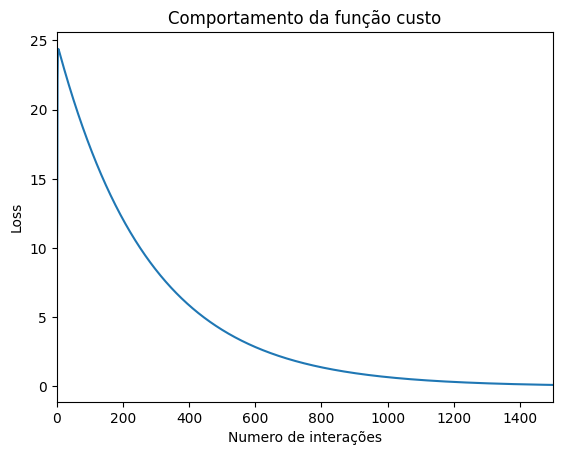

In [7]:
plt.plot(J_history)
plt.title('Comportamento da função custo')
plt.xlabel('Numero de interações')
plt.ylabel('Loss')
plt.xlim((0, iterations))


## Final

Finalmente podemos ver o resultado do coeficiente 'ideal' encontrado

Text(0.5, 0, 'População')

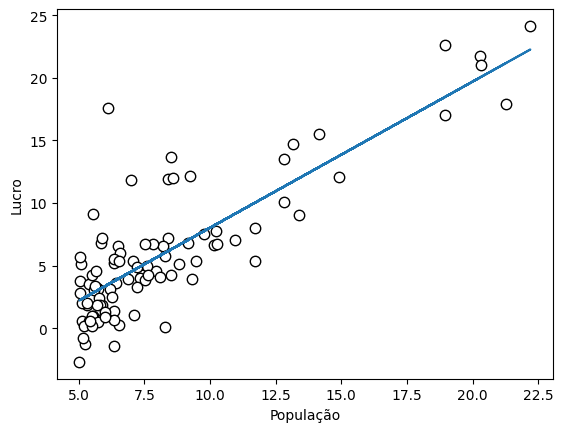

In [8]:
plt.plot(X[:, 1], y, 'wo', ms=7.5, mec='k')
plt.plot(X[:, 1], np.dot(X, theta))
plt.ylabel('Lucro')
plt.xlabel('População')


Podemos tambem comparar os valores dos coef encontrados e pelo Scikit-learn.

In [23]:
regr = LinearRegression()
regr.fit(X[:, 1].reshape(-1, 1), y.ravel())

print("Coefficients: \n", regr.intercept_, ',', regr.coef_[0])
print("Coefficients_My: \n", theta)


Coefficients: 
 -3.895780878311852 , 1.1930336441895937
Coefficients_My: 
 [-3.63029144  1.16636235]


E por fim podemos observar ambos os modelos lado a lado.

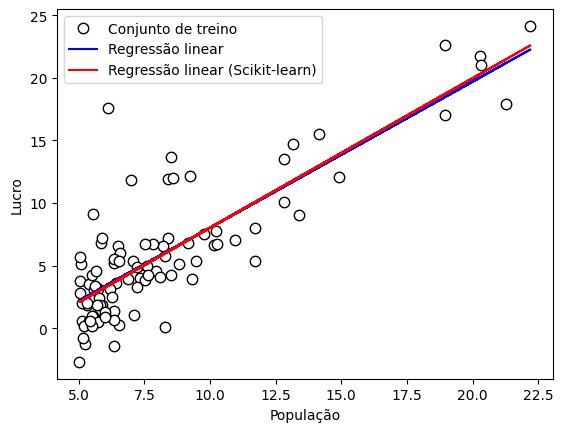

In [33]:
plt.plot(X[:, 1], y, 'wo', ms=7.5, mec='k')
plt.plot(X[:, 1], np.dot(X, theta), 'b')
plt.plot(X[:, 1], np.dot(X, [regr.intercept_, regr.coef_[0]]), 'r')
plt.ylabel('Lucro')
plt.xlabel('População')
plt.legend(['Conjunto de treino', 'Regressão linear','Regressão linear (Scikit-learn)'])
